# Loading and Viewing the Data

In [1]:
#Name: Berke Derin Berktay
#First, we need to import the necessary libraries that we are going to use further on into the study
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
#we first read the excel file's sheet labelled as 'ChildCareCentres'
df = pd.read_csv('INF2178_A4_data.csv')
df

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,366,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,16,3.0,21.0,1.0,1351,0.708,1.299
290,367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030
291,368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
292,370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331


In [2]:
df.head #let us try to get the sense of the data by simply observing it

<bound method NDFrame.head of      Unnamed: 0 Subject ID         MRI ID        Group  Visit  MR Delay M/F  \
0             0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M   
1             1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M   
2             2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M   
3             3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M   
4             5  OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F   
..          ...        ...            ...          ...    ...       ...  ..   
289         366  OAS2_0184  OAS2_0184_MR2     Demented      2       553   F   
290         367  OAS2_0185  OAS2_0185_MR1     Demented      1         0   M   
291         368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M   
292         370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F   
293         371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F   

    Hand  Age  EDUC  

# Checking zero and null values

In [3]:
#First, let us perform some data wrangling to ensure that our data at hand is top notch.
#Let us check the amount of null and 0 values for each variable to see if we should replace or delete 
#some of these values/columns if there are too many or too little missing.
def emptyandzero(df):
    empty_cells = df.isna().sum()
    print("EMPTY CELL COUNTS:")
    print(empty_cells)
    
    numerics = df.select_dtypes(include=np.number)
    zeroes = []
    for i in range(len(numerics.columns)):
        zeroes.append(numerics.columns[i])
        zeroes.append((numerics[numerics.columns[i]] == 0).sum())
    print("\nZERO CELL COUNTS:")
    print(zeroes)
    

In [4]:
emptyandzero(df)

EMPTY CELL COUNTS:
Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

ZERO CELL COUNTS:
['Unnamed: 0', 1, 'Visit', 0, 'MR Delay', 150, 'Age', 0, 'EDUC', 0, 'SES', 0, 'MMSE', 0, 'CDR', 158, 'eTIV', 0, 'nWBV', 0, 'ASF', 0]


In [5]:
# the only relavant null value is for the MMSE, so lets display that row firs to figure out why its empty and then delete it
df[df['MMSE'].isnull()]

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
282,357,OAS2_0181,OAS2_0181_MR2,Demented,2,539,F,R,75,12,NaN,NaN,1.0,1169,0.742,1.501


In [6]:
df = df.dropna(subset=['MMSE'])

# Feature Engineering

In [7]:
#Now, let us perform some feature engineering to see if we can delete some useless columns and/or create useful ones

In [8]:
#Throughout the analysis, it is pointless to keep several columns that we do not need to from now on due 
#to the new columns or are simply pointless such as incomeinthousands
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['MRI ID'], axis=1)
df = df.drop(['Group'], axis=1)
df = df.drop(['MR Delay'], axis=1)
df = df.drop(['Hand'], axis=1)
df = df.drop(['Age'], axis=1)
df = df.drop(['EDUC'], axis=1)
df = df.drop(['SES'], axis=1)
df = df.drop(['CDR'], axis=1)
df = df.drop(['eTIV'], axis=1)
df = df.drop(['nWBV'], axis=1)
df = df.drop(['ASF'], axis=1)

df.head #check with a random entry

<bound method NDFrame.head of     Subject ID  Visit M/F  MMSE
0    OAS2_0001      1   M  27.0
1    OAS2_0001      2   M  30.0
2    OAS2_0002      1   M  23.0
3    OAS2_0002      2   M  28.0
4    OAS2_0004      1   F  28.0
..         ...    ...  ..   ...
289  OAS2_0184      2   F  21.0
290  OAS2_0185      1   M  28.0
291  OAS2_0185      2   M  28.0
292  OAS2_0186      1   F  30.0
293  OAS2_0186      2   F  30.0

[293 rows x 4 columns]>

In [9]:
#lets count the amount of visit counts in total for all of the individuals
id_counts = df.groupby('Subject ID').size()

# Count how many IDs have 1, 2, or 3 entries
entries_count = id_counts.value_counts().sort_index()

# Display the amount of IDs that have 1, 2, and 3 entries
for entries, count in entries_count.items():
    print(f"IDs with {entries} entries: {count}")

IDs with 1 entries: 7
IDs with 2 entries: 143


In [10]:
#now for our purposes we delete the ID with a single entry
single_entry_ids = id_counts[id_counts == 1].index
df = df[~df['Subject ID'].isin(single_entry_ids)]

id_counts = df.groupby('Subject ID').size()
# Count how many IDs have 1, 2, or 3 entries
entries_count = id_counts.value_counts().sort_index()
for entries, count in entries_count.items():
    print(f"IDs with {entries} entries: {count}")

IDs with 2 entries: 143


# Exploratory Data Analysis

/var/folders/dv/x_yhvm8x1vj_7019b6vm83pr0000gn/T/ipykernel_69382/1023765658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['Subject ID', 'Visit'], inplace=True)


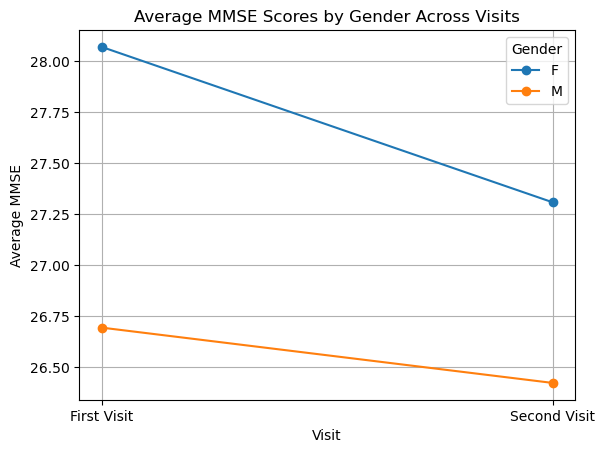

In [12]:
df.sort_values(by=['Subject ID', 'Visit'], inplace=True)
average_mmse_by_gender_visit = df.groupby(['M/F', 'Visit'])['MMSE'].mean().unstack()
fig, ax = plt.subplots()
average_mmse_by_gender_visit.T.plot(kind='line', marker='o', ax=ax)
ax.set_xlabel('Visit')
ax.set_ylabel('Average MMSE')
ax.set_title('Average MMSE Scores by Gender Across Visits')
ax.set_xticks([1, 2])
ax.set_xticklabels(['First Visit', 'Second Visit'])
ax.grid(True)

plt.legend(title='Gender')
plt.show()

<Axes: xlabel='Visit', ylabel='MMSE'>

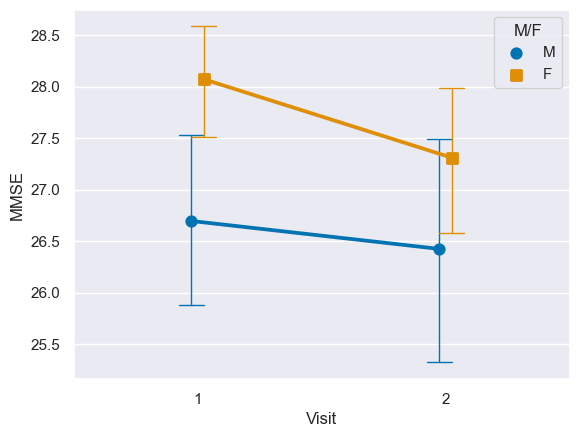

In [13]:
sns.set()
sns.pointplot(data=df, x='Visit', y='MMSE', hue='M/F', dodge=True, markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='colorblind')

In [14]:
def summary_stats(label): #Baseline function that we will use for repetition prevention purposes
    
    mean = np.round(np.mean(label), 2)
    median = np.round(np.median(label), 2)
    minval = np.round(label.min(), 2)
    maxval = np.round(label.max(), 2)
    quartile1 = np.round(label.quantile(0.25), 2)
    quartile3 = np.round(label.quantile(0.75), 2)
    iqr = np.round(quartile3 - quartile1, 2) #computations for the EDA
    
    print('Min: %s' % minval)
    print('Max: %s' % maxval)
    print('Mean: %s' % mean)
    print('25th percentile: %s' % quartile1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile3)
    print('IQR : %s' % iqr)

In [15]:
for (visit, gender), group_data in df.groupby(['Visit', 'M/F']):
    print(f"\nSummary Statistics for Visit {visit} and Gender {gender}:")
    summary_stats(group_data['MMSE'])



Summary Statistics for Visit 1 and Gender F:
Min: 19.0
Max: 30.0
Mean: 28.07
25th percentile: 27.0
Median: 29.0
75th percentile: 30.0
IQR : 3.0

Summary Statistics for Visit 1 and Gender M:
Min: 17.0
Max: 30.0
Mean: 26.69
25th percentile: 25.0
Median: 28.0
75th percentile: 29.0
IQR : 4.0

Summary Statistics for Visit 2 and Gender F:
Min: 15.0
Max: 30.0
Mean: 27.31
25th percentile: 27.0
Median: 28.5
75th percentile: 30.0
IQR : 3.0

Summary Statistics for Visit 2 and Gender M:
Min: 15.0
Max: 30.0
Mean: 26.42
25th percentile: 25.0
Median: 28.0
75th percentile: 29.0
IQR : 4.0


In [16]:
df.groupby(['Visit', 'M/F'])['MMSE'].agg(['mean', 'std']).round(2)

mean   std
Visit M/F             
1     F    28.07  2.62
      M    26.69  3.36
2     F    27.31  3.41
      M    26.42  4.30

# Mixed-Effect ANOVA and Assumptions

In [17]:
df.head

<bound method NDFrame.head of     Subject ID  Visit M/F  MMSE
0    OAS2_0001      1   M  27.0
1    OAS2_0001      2   M  30.0
2    OAS2_0002      1   M  23.0
3    OAS2_0002      2   M  28.0
4    OAS2_0004      1   F  28.0
..         ...    ...  ..   ...
289  OAS2_0184      2   F  21.0
290  OAS2_0185      1   M  28.0
291  OAS2_0185      2   M  28.0
292  OAS2_0186      1   F  30.0
293  OAS2_0186      2   F  30.0

[286 rows x 4 columns]>

In [18]:
import pingouin as pg

In [19]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='MMSE', within='Visit', between='M/F', subject='Subject ID', data=df)
pg.print_table(aov)


ANOVA SUMMARY

Source           SS    DF1    DF2      MS      F    p-unc    np2      eps
-----------  ------  -----  -----  ------  -----  -------  -----  -------
M/F          88.689      1    141  88.689  4.321    0.039  0.030  nan
Visit        22.378      1    141  22.378  8.610    0.004  0.058    1.000
Interaction   4.173      1    141   4.173  1.606    0.207  0.011  nan



In [20]:
posthocs = pg.pairwise_ttests(dv='MMSE', within='Visit', between='M/F',
                              subject='Subject ID', data=df)
pg.print_table(posthocs)


POST HOC TESTS

Contrast     Visit    A    B    Paired    Parametric        T      dof  alternative      p-unc    BF10    hedges
-----------  -------  ---  ---  --------  ------------  -----  -------  -------------  -------  ------  --------
Visit        -        1    2    True      True          2.928  142.000  two-sided        0.004   5.530     0.162
M/F          -        F    M    False     True          1.990  104.517  two-sided        0.049   1.098     0.351
Visit * M/F  1        F    M    False     True          2.633  104.908  two-sided        0.010   4.138     0.464
Visit * M/F  2        F    M    False     True          1.319  106.117  two-sided        0.190   0.402     0.232



/Users/derinberktay/anaconda3/lib/python3.10/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.

In [22]:
#checking assumptions
#mauchly's test of spericity
pg.sphericity(data=df, dv='MMSE', subject='Subject ID', within='Visit')[-1]


1.0

In [23]:
#test of normality
pg.normality(data=df, dv='MMSE', group='Visit')     

,W,pval,normal
Visit,,,
1,0.792239,5.775022e-13,False
2,0.760727,5.430537e-14,False


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


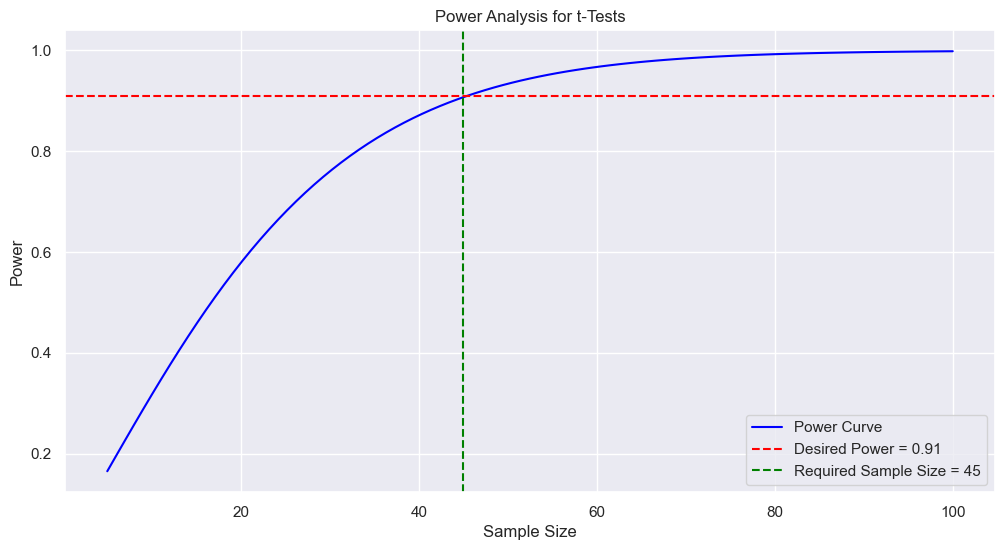

Required sample size: 45


In [24]:
from statsmodels.stats.power import TTestIndPower

# Parameters
effect_size = 0.7
alpha = 0.05
power = 0.91

# Initialize power analysis object
power_analysis = TTestIndPower()

# Calculate required sample size
sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0)
sample_size = round(sample_size)

# Generate power curve
sample_sizes = np.linspace(5, 100, 95)
powers = power_analysis.power(effect_size=effect_size, nobs1=sample_sizes, alpha=alpha, ratio=1.0)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, powers, label='Power Curve', color='blue')
plt.axhline(y=power, color='red', linestyle='--', label=f'Desired Power = {power}')
plt.axvline(x=sample_size, color='green', linestyle='--', label=f'Required Sample Size = {sample_size}')
plt.title('Power Analysis for t-Tests')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.show()

print(f"Required sample size: {sample_size}")